In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance.csv


In [90]:
import torch
import torchvision
from torchvision.datasets.utils import download_url
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
%matplotlib inline
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.utils.data import random_split

In [91]:
#DATASET_URL= "https://hub.jovian.ml/wp-content/uploads/2020/05/insurance.csv"
#DATA_FILENAME='insurance.csv'
#download_url=(DATASET_URL,'.')

In [92]:
data=pd.read_csv('../input/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [93]:
your_name='saurrav'
#len(data)
ord(your_name[1])

97

In [94]:
def customize_dataset(data,your_name):
    dataframe=data.copy(deep=True)
    
    # drop some rows
    dataframe=dataframe.sample(int(0.95*len(dataframe)),random_state=int(ord(your_name[0])))
    
    # scale input
    dataframe.bmi=dataframe.bmi*ord(your_name[1])/100
    
    # scale target
    dataframe.charges=dataframe.charges*ord(your_name[2])/100
    
    # drop_col
    if ord(your_name[3])%2==1:
        dataframe=dataframe.drop(['region'],axis=1)
    return dataframe

In [95]:
dataframe=customize_dataset(data,your_name)
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
1178,23,female,33.81905,0,no,northeast,3392.402539
1295,20,male,21.34000,1,no,southwest,2298.792600
205,28,female,28.01360,1,no,northeast,5075.150184
1067,39,male,41.37535,0,no,northeast,6736.173736
523,38,female,36.59810,0,no,southeast,6315.211539


##  how many rows does the dataset have

In [96]:
num_rows=dataframe.shape[0]
num_rows

1271

## how many cols  does the dataframe have

In [97]:
num_cols=dataframe.shape[1]
num_cols

7

##  input colms

In [98]:
# if the dataset is too large we can handwritten all column names in list
dummi=dataframe.copy(deep=True)

if list(dummi.columns.values)!='charges':
    del dummi['charges']
    input_cols=list(dummi.columns.values)
input_cols

['age', 'sex', 'bmi', 'children', 'smoker', 'region']


## Which of the input columns are non-numeric or categorial variables ?

In [99]:
categorical_cols = list(dataframe.select_dtypes(include=['object']).columns)
categorical_cols

['sex', 'smoker', 'region']

In [100]:
output_cols=['charges']

## Step 2: Prepare the dataset for training

In [101]:
def dataframe_to_arrays(dataframe):
    
    # copy the dataframe first
    dataframe1=dataframe.copy(deep=True)
    
    # convert non-numerical columns to numbers
    for cols in categorical_cols:
        dataframe1[cols]=dataframe1[cols].astype('category').cat.codes
    
    # convert input into numpy array
    inputs_array=dataframe1[input_cols].to_numpy()
    
    # convert target into numpy array
    targets_array=dataframe1[output_cols].to_numpy()
    
    return inputs_array,targets_array

In [102]:
inputs_array,targets_array=dataframe_to_arrays(dataframe)
inputs_array,targets_array

(array([[23.     ,  0.     , 33.81905,  0.     ,  0.     ,  0.     ],
        [20.     ,  1.     , 21.34   ,  1.     ,  0.     ,  3.     ],
        [28.     ,  0.     , 28.0136 ,  1.     ,  0.     ,  0.     ],
        ...,
        [53.     ,  0.     , 25.899  ,  2.     ,  0.     ,  3.     ],
        [26.     ,  1.     , 26.2482 ,  0.     ,  1.     ,  2.     ],
        [19.     ,  0.     , 27.4607 ,  0.     ,  1.     ,  1.     ]]),
 array([[ 3392.4025395],
        [ 2298.7926   ],
        [ 5075.150184 ],
        ...,
        [13046.4126   ],
        [19940.709438 ],
        [20438.711163 ]]))

## convert numpy array into pytorch array

In [103]:
inputs =torch.from_numpy(inputs_array).type(torch.float32)
targets=torch.from_numpy(targets_array).type(torch.float32)

In [104]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [105]:
dataset=TensorDataset(inputs,targets)

##  to split a dataset into training and validation dataset

In [106]:
val_per=0.1
val_size=int(num_rows*val_per)
train_size=num_rows-val_size

train_ds,val_ds=random_split(dataset,[train_size,val_size])

In [107]:
batch_size=64
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)

In [108]:
for xb,yb in train_loader:
    print(xb)
    print(yb)

tensor([[59.0000,  0.0000, 35.6620,  1.0000,  1.0000,  0.0000],
        [55.0000,  0.0000, 24.6040,  3.0000,  0.0000,  0.0000],
        [19.0000,  1.0000, 26.8690,  0.0000,  1.0000,  3.0000],
        [32.0000,  1.0000, 36.0646,  2.0000,  0.0000,  2.0000],
        [18.0000,  0.0000, 35.7445,  0.0000,  1.0000,  2.0000],
        [52.0000,  1.0000, 40.5460,  2.0000,  1.0000,  2.0000],
        [63.0000,  1.0000, 40.2259,  0.0000,  0.0000,  2.0000],
        [20.0000,  1.0000, 26.4810,  0.0000,  1.0000,  3.0000],
        [19.0000,  1.0000, 33.8530,  0.0000,  1.0000,  3.0000],
        [52.0000,  1.0000, 31.7917,  3.0000,  0.0000,  1.0000],
        [43.0000,  0.0000, 31.5832,  3.0000,  1.0000,  2.0000],
        [28.0000,  1.0000, 35.3080,  1.0000,  1.0000,  3.0000],
        [62.0000,  0.0000, 36.9521,  2.0000,  0.0000,  0.0000],
        [21.0000,  1.0000, 24.9727,  2.0000,  0.0000,  0.0000],
        [58.0000,  0.0000, 32.4368,  0.0000,  0.0000,  1.0000],
        [54.0000,  0.0000, 22.3100,  3.0

In [109]:
input_size=len(input_cols)
output_size=len(output_cols)
input_size,output_size

(6, 1)

## creating model

In [110]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,xb):
        out=self.linear(xb)
        return out
    def training_step(self,batch):
        inputs,targets=batch
        out=self(inputs)
        loss=F.l1_loss(out,targets)
        return loss
    def validation_step(self,batch):
        inputs,targets=batch
        out=self(inputs)
        loss=F.l1_loss(out,targets)
        return {'val_loss':loss.detach()}
    def validation_epoch_end(self,outputs):
        batch_loss=[x['val_loss'] for x in outputs]
        epoch_loss=torch.stack(batch_loss).mean()
        return {'val_loss':epoch_loss.item()}
    def epoch_ends(self,epoch,result,num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

            


In [111]:
model = InsuranceModel()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0450,  0.2067,  0.2909, -0.0215, -0.1203, -0.2051]],
        requires_grad=True),
 Parameter containing:
 tensor([0.2736], requires_grad=True)]

## Step 4: Train the model to fit the data

In [112]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_ends(epoch, result, epochs)
        history.append(result)
    return history

In [113]:
result=evaluate(model,val_loader)
result

{'val_loss': 13475.0380859375}

In [115]:
epochs = 100
lr = 1e-6
history6 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 13473.7705
Epoch [40], val_loss: 13472.9219
Epoch [60], val_loss: 13472.0762
Epoch [80], val_loss: 13471.2295
Epoch [100], val_loss: 13470.3857


In [116]:
epochs = 100
lr = 1e-5
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 13461.9229
Epoch [40], val_loss: 13453.4629
Epoch [60], val_loss: 13445.0020
Epoch [80], val_loss: 13436.5371
Epoch [100], val_loss: 13428.0781


In [117]:
epochs = 100
lr = 1e-4
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 13343.4668
Epoch [40], val_loss: 13258.8555
Epoch [60], val_loss: 13174.2422
Epoch [80], val_loss: 13089.6211
Epoch [100], val_loss: 13005.0059


In [118]:
epochs = 100
lr = 1e-3
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 12158.9023
Epoch [40], val_loss: 11336.4180
Epoch [60], val_loss: 10599.3047
Epoch [80], val_loss: 9955.1289
Epoch [100], val_loss: 9391.7402


In [119]:
epochs = 100
lr = 1e-2
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 7383.3569
Epoch [40], val_loss: 7300.4941
Epoch [60], val_loss: 7249.7017
Epoch [80], val_loss: 7199.1338
Epoch [100], val_loss: 7151.6299


In [120]:
epochs = 100
lr = 1e-1
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 6744.0264
Epoch [40], val_loss: 6592.5840
Epoch [60], val_loss: 6571.5352
Epoch [80], val_loss: 6566.9019
Epoch [100], val_loss: 6559.5254


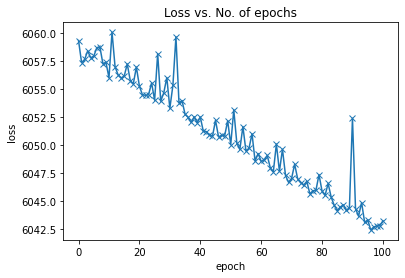

In [88]:
val_loss = [result]+history1+history2+history3+history4+history5+history6
val_loss_list = [vl['val_loss'] for vl in val_loss]
plt.plot(val_loss_list, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [89]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)
    
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([51.0000,  1.0000, 22.5137,  1.0000,  1.0000,  2.0000])
Target: tensor([25995.1953])
Prediction: tensor([12985.3945])
